# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

import math as math

import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load and process data

In [3]:
## US Data ##

data = pd.read_csv("../data/covid_data.csv", dtype = str)

#Data types
data['date'] = pd.to_datetime(data['date'])
data['lat'] = pd.to_numeric(data['lat'])
data['long_'] = pd.to_numeric(data['long_'])
data['confirmed'] = pd.to_numeric(data['confirmed'])
data['deaths'] = pd.to_numeric(data['deaths'])

## Global Data ##
data_global = pd.read_csv("../data/covid_data_global.csv", dtype = str)

#Data types
data_global['date'] = pd.to_datetime(data_global['date'])
data_global['lat'] = pd.to_numeric(data_global['lat'])
data_global['long'] = pd.to_numeric(data_global['long'])
data_global['confirmed'] = pd.to_numeric(data_global['confirmed'])
data_global['deaths'] = pd.to_numeric(data_global['deaths'])


### Calculate Incident Cases

In [4]:
#US
data = data.sort_values(by = ['fips','date'])
data['prev_confirmed'] = data['confirmed'].shift(1) * \
    (data['fips'].fillna('') == \
     data['fips'].shift(1).fillna(''))
data['incident_cases'] = data.confirmed - data.prev_confirmed

#Global
data_global = data_global.sort_values(by = ['country_region','province_state','date'])
data_global['prev_confirmed'] = data_global['confirmed'].shift(1) * \
    (data_global['province_state'].fillna('') + data_global['country_region'].fillna('') == \
     data_global['province_state'].shift(1).fillna('') + data_global['country_region'].shift(1).fillna(''))
data_global['incident_cases'] = data_global.confirmed - data_global.prev_confirmed

#data_global.head(400)
#data.head(400)

### Preview the Data

In [5]:
data.head()

,uid,iso2,iso3,code3,fips,county,province_state,country_region,lat,long_,combined_key,confirmed,deaths,date,prev_confirmed,incident_cases
321,84010001,US,USA,840,10001.0,Kent,Delaware,US,39.086466,-75.568849,"Kent, Delaware, US",0,0,2020-01-22,NaN,NaN
3574,84010001,US,USA,840,10001.0,Kent,Delaware,US,39.086466,-75.568849,"Kent, Delaware, US",0,0,2020-01-23,0.0,0.0
6827,84010001,US,USA,840,10001.0,Kent,Delaware,US,39.086466,-75.568849,"Kent, Delaware, US",0,0,2020-01-24,0.0,0.0
10080,84010001,US,USA,840,10001.0,Kent,Delaware,US,39.086466,-75.568849,"Kent, Delaware, US",0,0,2020-01-25,0.0,0.0
13333,84010001,US,USA,840,10001.0,Kent,Delaware,US,39.086466,-75.568849,"Kent, Delaware, US",0,0,2020-01-26,0.0,0.0


## Time Trends

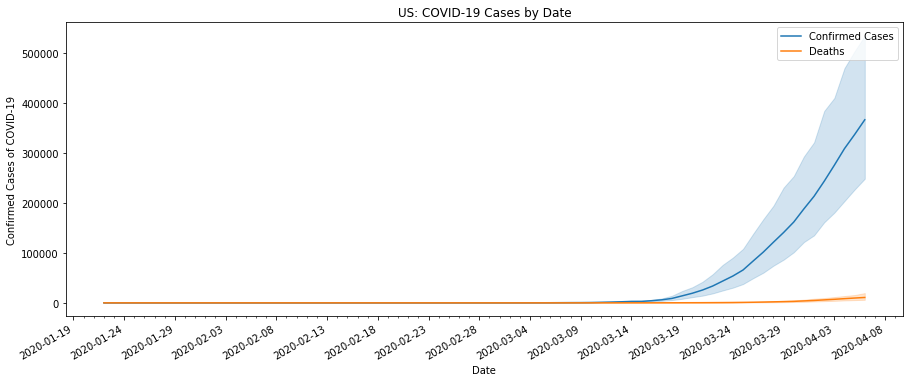

In [6]:
fig, ax = plt.subplots(figsize = (15,6))
sns.lineplot(x = data.date, y = data.confirmed, estimator = 'sum', label = 'Confirmed Cases')
sns.lineplot(x = data.date, y = data.deaths, estimator = 'sum', label = 'Deaths')
#sns.lineplot(x = data.date, y = data.incident_cases, estimator = 'sum', label = 'Incident Cases')
#Labels
plt.title("US: COVID-19 Cases by Date")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases of COVID-19")
#Format x-axis
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.show();

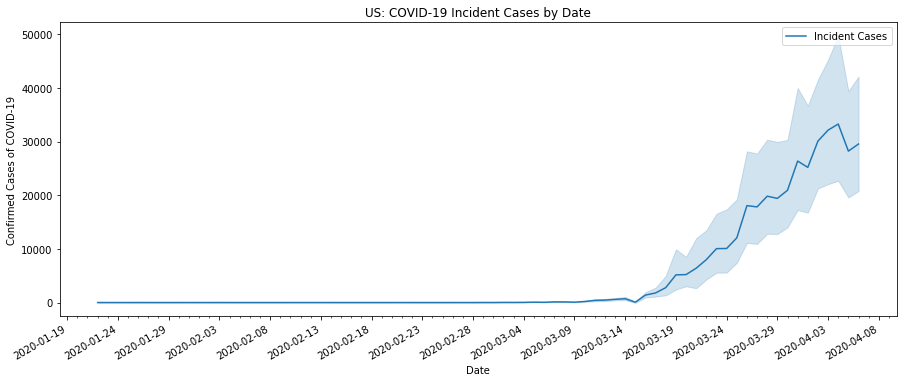

In [7]:
fig, ax = plt.subplots(figsize = (15,6))
# sns.lineplot(x = data.date, y = data.confirmed, estimator = 'sum', label = 'Confirmed Cases')
# sns.lineplot(x = data.date, y = data.deaths, estimator = 'sum', label = 'Deaths')
sns.lineplot(x = data.date, y = data.incident_cases, estimator = 'sum', label = 'Incident Cases')
#Labels
plt.title("US: COVID-19 Incident Cases by Date")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases of COVID-19")
#Format x-axis
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show();

**jjj**

## State Trends

### New York City Trends

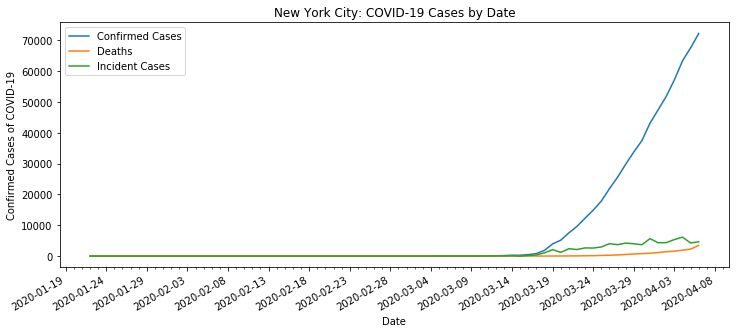

In [8]:
nyc = data[(data.province_state == 'New York') & (data.county == 'New York')]

fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(x = nyc.date, y = nyc.confirmed, estimator = 'sum', label = 'Confirmed Cases')
sns.lineplot(x = nyc.date, y = nyc.deaths, estimator = 'sum', label = 'Deaths')
sns.lineplot(x = nyc.date, y = nyc.incident_cases, estimator = 'sum', label = 'Incident Cases')
#Labels
plt.title("New York City: COVID-19 Cases by Date")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases of COVID-19")
#Format x-axis
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show();

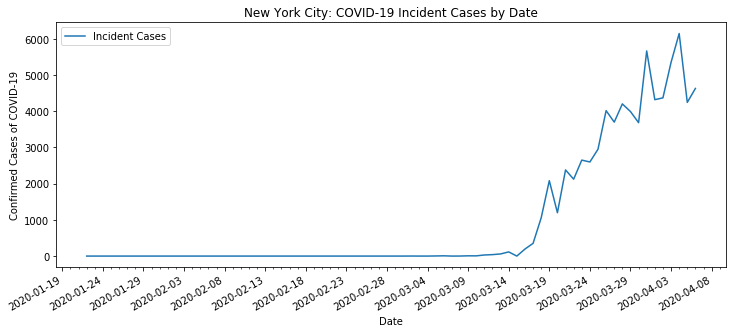

In [9]:
fig, ax = plt.subplots(figsize = (12,5))
# sns.lineplot(x = nyc.date, y = nyc.confirmed, estimator = 'sum', label = 'Confirmed Cases')
# sns.lineplot(x = nyc.date, y = nyc.deaths, estimator = 'sum', label = 'Deaths')
sns.lineplot(x = nyc.date, y = nyc.incident_cases, estimator = 'sum', label = 'Incident Cases')
#Labels
plt.title("New York City: COVID-19 Incident Cases by Date")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases of COVID-19")
#Format x-axis
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show();

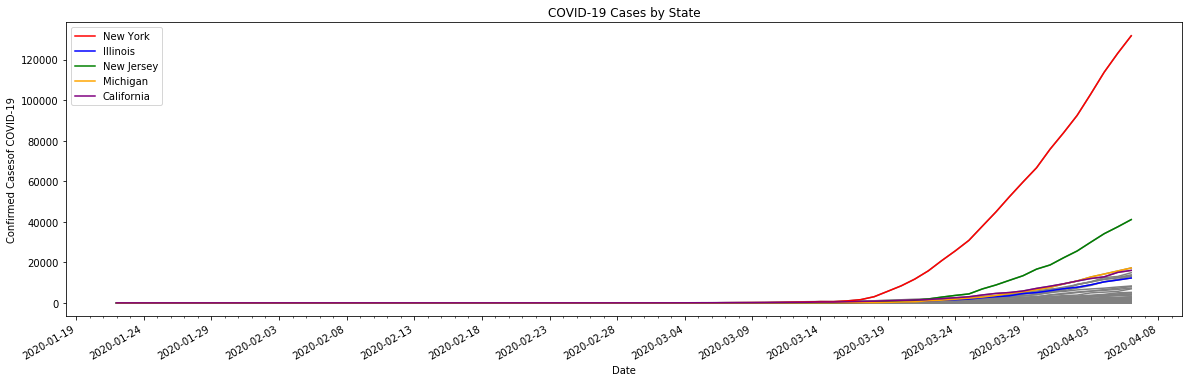

In [10]:

fig, ax = plt.subplots(figsize = (20,6))
#All states
for st in np.unique(data.province_state):
    sns.lineplot(x = data[data.province_state == st].date, y = data[data.province_state == st].confirmed, \
                 estimator = 'sum', err_style = None, color = "gray")
#Outlier states
for st, c in zip(["New York","Illinois","New Jersey","Michigan", "California"], \
                 ["red", "blue", "green", "orange", "purple"]):
    sns.lineplot(x = data[data.province_state == st].date, y = data[data.province_state == st].confirmed, \
                 label = st, estimator = 'sum', err_style = None, color = c)
#Labels
plt.title("COVID-19 Cases by State")
plt.xlabel("Date")
plt.ylabel("Confirmed Casesof COVID-19")
#Format x-axis
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show();


**yiiy**

In [11]:
data[data.date == '2020-04-02'].groupby(data.province_state).confirmed.sum().sort_values(ascending = False).head(10)

province_state
New York         92506
New Jersey       25590
Michigan         10791
California       10773
Louisiana         9159
Florida           9008
Massachusetts     8966
Illinois          7695
Pennsylvania      7268
Washington        6389
Name: confirmed, dtype: int64

In [12]:
data[data.date == '2020-04-02'].sort_values(by = ['confirmed'], axis = 0, ascending = False).head()


,uid,iso2,iso3,code3,fips,county,province_state,country_region,lat,long_,combined_key,confirmed,deaths,date,prev_confirmed,incident_cases
232826,84036061,US,USA,840,36061.0,New York,New York,US,40.767273,-73.971526,"New York City, New York, US",51809,1397,2020-04-02,47439.0,4370.0
232855,84036119,US,USA,840,36119.0,Westchester,New York,US,41.162784,-73.757417,"Westchester, New York, US",11567,64,2020-04-02,10683.0,884.0
232825,84036059,US,USA,840,36059.0,Nassau,New York,US,40.740665,-73.589419,"Nassau, New York, US",10587,76,2020-04-02,9554.0,1033.0
232847,84036103,US,USA,840,36103.0,Suffolk,New York,US,40.883201,-72.801217,"Suffolk, New York, US",8746,69,2020-04-02,7605.0,1141.0
231578,84017031,US,USA,840,17031.0,Cook,Illinois,US,41.841448,-87.816588,"Cook, Illinois, US",5575,107,2020-04-02,5152.0,423.0


## Global Trends

### Italy

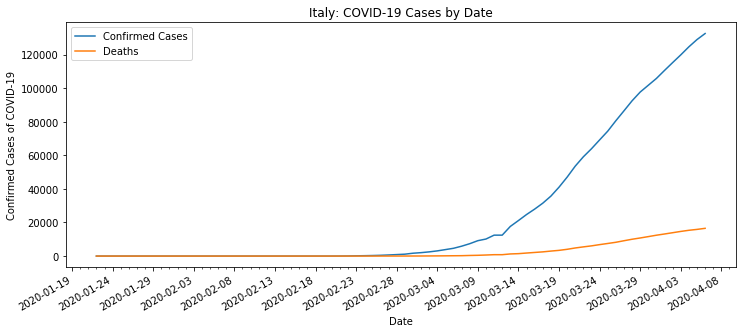

In [13]:
italy = data_global[data_global.country_region == 'Italy']

fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(x = italy.date, y = italy.confirmed, estimator = 'sum', label = 'Confirmed Cases')
sns.lineplot(x = italy.date, y = italy.deaths, estimator = 'sum', label = 'Deaths')
#sns.lineplot(x = italy.date, y = italy.incident_cases, estimator = 'sum', label = 'Incident Cases')
#Labels
plt.title("Italy: COVID-19 Cases by Date")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases of COVID-19")
#Format x-axis
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show();

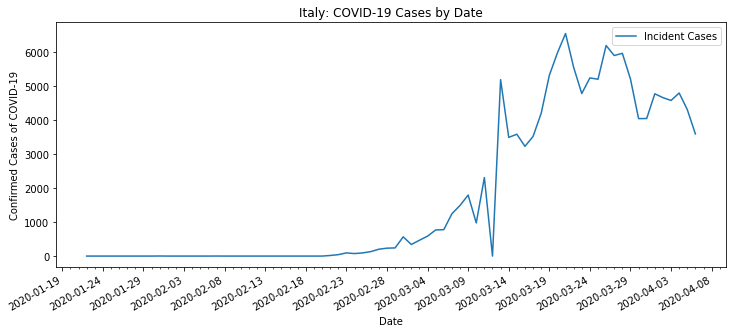

In [14]:
fig, ax = plt.subplots(figsize = (12,5))
# sns.lineplot(x = italy.date, y = italy.confirmed, estimator = 'sum', label = 'Confirmed Cases')
# sns.lineplot(x = italy.date, y = italy.deaths, estimator = 'sum', label = 'Deaths')
sns.lineplot(x = italy.date, y = italy.incident_cases, estimator = 'sum', label = 'Incident Cases')
#Labels
plt.title("Italy: COVID-19 Cases by Date")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases of COVID-19")
#Format x-axis
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show();

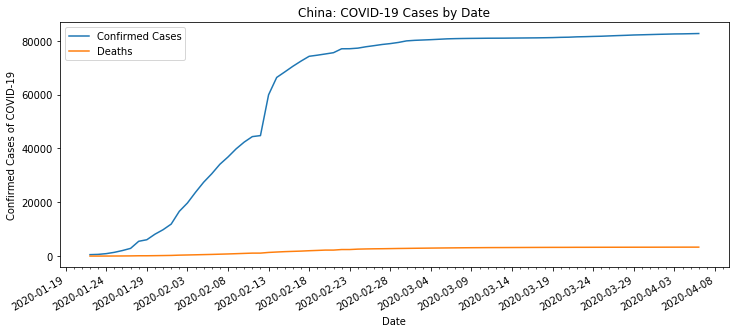

In [15]:
china = data_global[data_global.country_region == 'China']

fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(x = china.date, y = china.confirmed, estimator = 'sum', err_style = None, label = 'Confirmed Cases')
sns.lineplot(x = china.date, y = china.deaths, estimator = 'sum', err_style = None, label = 'Deaths')
#sns.lineplot(x = china.date, y = china.incident_cases, estimator = 'sum', err_style = None, label = 'Incident Cases')
#Labels
plt.title("China: COVID-19 Cases by Date")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases of COVID-19")
#Format x-axis
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show();

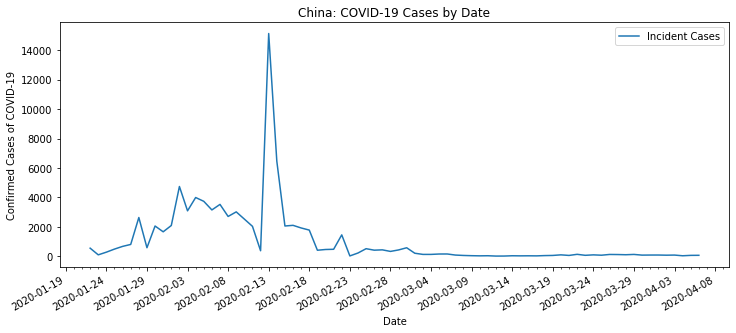

In [16]:

fig, ax = plt.subplots(figsize = (12,5))
# sns.lineplot(x = china.date, y = china.confirmed, estimator = 'sum', err_style = None, label = 'Confirmed Cases')
# sns.lineplot(x = china.date, y = china.deaths, estimator = 'sum', err_style = None, label = 'Deaths')
sns.lineplot(x = china.date, y = china.incident_cases, estimator = 'sum', err_style = None, label = 'Incident Cases')
#Labels
plt.title("China: COVID-19 Cases by Date")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases of COVID-19")
#Format x-axis
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show();

## Geographic Trends

### USA

In [17]:
#Remove territories for mapping purposes
non_states = ['American Samoa','Diamond Princess', 'Grand Princess','Guam','Northern Mariana Islands', 'Puerto Rico'\
             , 'Virgin Islands']
data = data[~data['province_state'].isin(non_states)]

#Groupby to get daily totals
daily_total = data.groupby(['date','province_state'], as_index = False).sum()

#Load in shapefile of the US states
#from https://alicia.data.socrata.com/Government/States-21basic/jhnu-yfrj
usa = gpd.read_file('../data/States_21basic/geo_export_d7c791c0-6990-477e-9d1c-462fd3ff41b3.shp')
shape_data = usa.merge(daily_total, left_on = 'state_name', right_on = 'province_state')

In [18]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

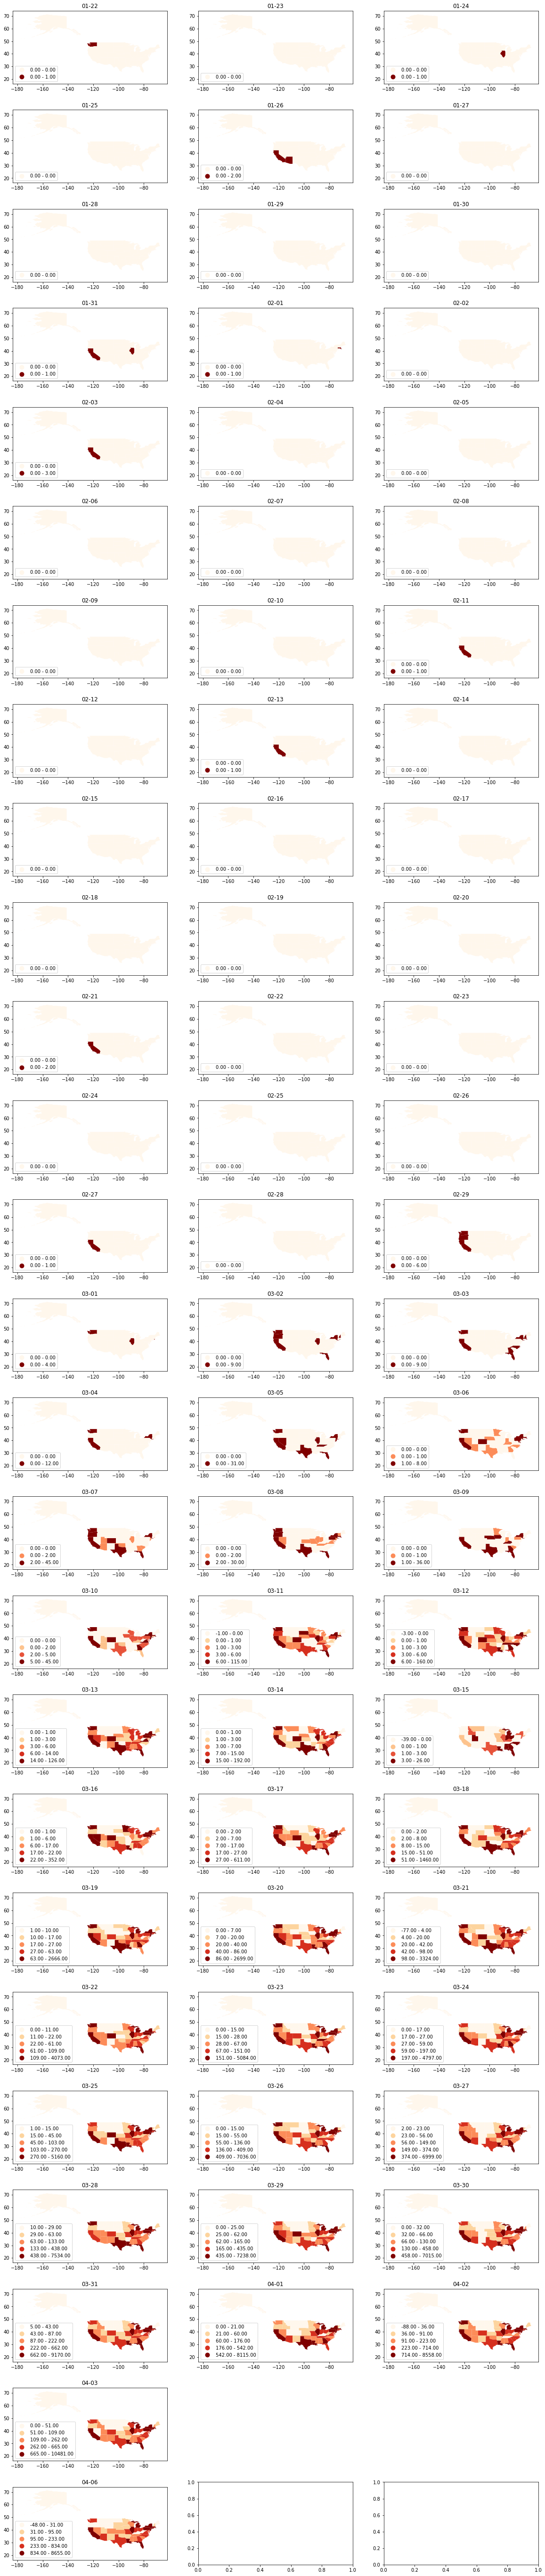

In [20]:
#to be able to use scheme = "quantiles"
#use - conda install -c conda-forge mapclassify

#getting the number of days as this will change with our
#daily updating data

num_days = len(shape_data.date.unique())

fig, axs = plt.subplots(math.ceil(num_days/3), 3, figsize = (20,100))

#Delete excess plots depending on how many days we are looking at
if np.mod(num_days, 3) == 2:
    fig.delaxes(axs[24][2])
elif np.mod(num_days, 3) == 1:
    fig.delaxes(axs[24][2])
    fig.delaxes(axs[24][1])


num= 0
num2= 0
for i in shape_data.date.unique():
    shape_data[shape_data.date == i].plot(column = 'incident_cases', cmap='OrRd',\
                                          legend = True,
                                          ax=axs[num][num2],
                                          scheme="quantiles",
                                        legend_kwds={'loc': 'lower left'})
    axs[num][num2].set_title(i.astype('str')[5:10])
    
    num2+=1
    
    #go to the next row
    if num2 == 3:
        num2 =0
        num+=1

**These maps by quantile give us the perspective of categorizing states based on their number of incident cases relative to others. With quantiles we do not have the issue of epicenters like New York preventing us from seeing information about all other states.**

### China

In [21]:
china_shapes = gpd.read_file('../data/chn_admbnda_adm1_ocha/chn_admbnda_adm1_ocha.shp')

#formatting to ensure that the province names are the same
china_shapes['ADM1_EN'] = china_shapes['ADM1_EN'].str.split(' ').str[0]

china['province_state'] = china['province_state'].str.split(' ').str[0]
china.province_state = china.province_state.replace('Macau', 'Macao')
china_shapes.drop(china_shapes[china_shapes.ADM1_EN == 'Taiwan'].index, inplace=True)

#same methodology as with the US - groupby to get daily totals
daily_china_total = china.groupby(['date','province_state'], as_index = False).sum()

#merge in the geospatial data on province name
china_shape_data = china_shapes.merge(daily_china_total, left_on = 'ADM1_EN', right_on = 'province_state')

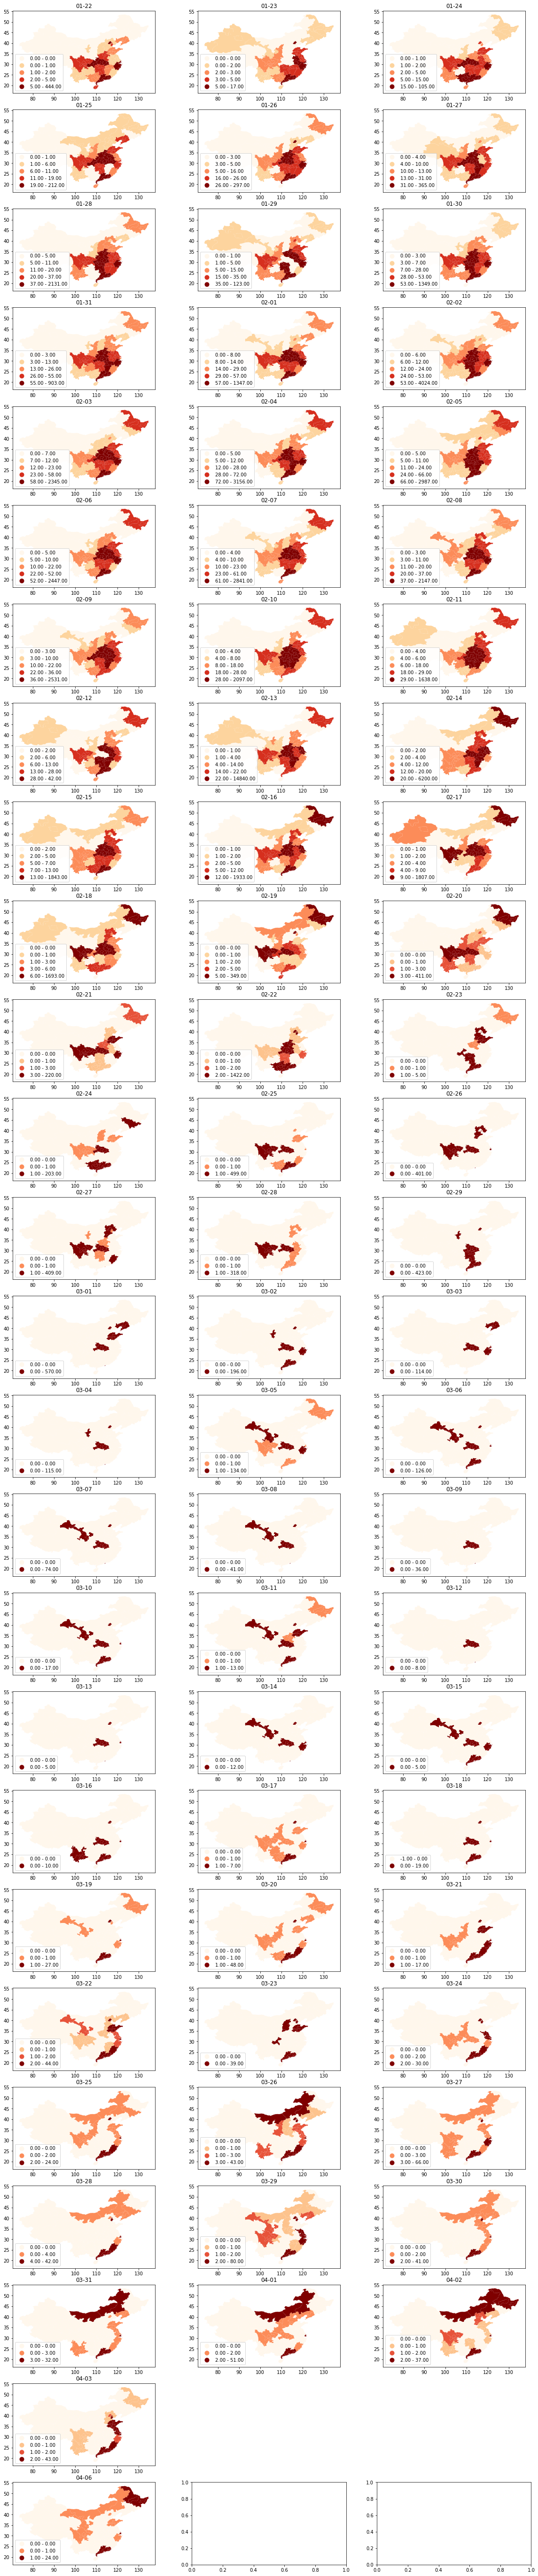

In [22]:
#to be able to use scheme = "quantiles"
#use - conda install -c conda-forge mapclassify

#getting the number of days as this will change with our
#daily updating data

num_days = len(china_shape_data.date.unique())

fig, axs = plt.subplots(math.ceil(num_days/3), 3, figsize = (20,100))

#Delete excess plots depending on how many days we are looking at
if np.mod(num_days, 3) == 2:
    fig.delaxes(axs[24][2])
elif np.mod(num_days, 3) == 1:
    fig.delaxes(axs[24][2])
    fig.delaxes(axs[24][1])


num= 0
num2= 0
for i in china_shape_data.date.unique():
    china_shape_data[china_shape_data.date == i].plot(column = 'incident_cases', cmap='OrRd',\
                                          legend = True,
                                          ax=axs[num][num2],
                                          scheme="quantiles",
                                        legend_kwds={'loc': 'lower left'})
    axs[num][num2].set_title(i.astype('str')[5:10])
    
    num2+=1
    
    #go to the next row
    if num2 == 3:
        num2 =0
        num+=1

We can see the spread from Wuhan in these maps!

## Key Takeaways

Our first approach would be to gather more data about the regional demographics, possibly from Census data. This would help us in further understanding how different demographic factors affect disease incidence. We would use the data to perform some sort of time series analysis to understand the patterns and possibly understand further spread in the future.